# Convolutional Neural Network

### Importing the libraries

In [ ]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
tf.__version__

'2.9.2'

## Part 1 - Data Preprocessing

### Preprocessing the Training set

In [ ]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/project01/dataset/train_data',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

Found 1016 images belonging to 2 classes.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
training_set.class_indices

{'bull': 0, 'pomerian': 1}

### Preprocessing the Test set

In [ ]:
test_datagen = ImageDataGenerator(rescale = 1./255)
testing_set = test_datagen.flow_from_directory('/content/drive/MyDrive/project01/dataset/test_data',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary')

Found 594 images belonging to 2 classes.


## Part 2 - Building the CNN

### Initialising the CNN

In [ ]:
cnn = tf.keras.models.Sequential()

### Step 1 - Convolution

In [ ]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[64, 64, 3]))

### Step 2 - Pooling

In [ ]:
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

### Adding a second convolutional layer

In [ ]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

# Adding a third convolutional layer

In [ ]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

### Step 3 - Flattening

In [ ]:
cnn.add(tf.keras.layers.Flatten())

### Step 4 - Full Connection

# 1st dense layer

In [ ]:
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))

# 2nd dense layer

In [ ]:
cnn.add(tf.keras.layers.Dense(units=64, activation='relu'))

### Step 5 - Output Layer

In [ ]:
cnn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

## Part 3 - Training the CNN

### Compiling the CNN

In [ ]:
cnn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

### Training the CNN on the Training set and evaluating it on the Test set

In [ ]:
cnn.fit(x = training_set, validation_data = testing_set, epochs = 50)

Epoch 1/50
32/32 [==============================] - 51s 2s/step - loss: 0.6872 - accuracy: 0.5404 - val_loss: 0.6737 - val_accuracy: 0.5741
Epoch 2/50
32/32 [==============================] - 30s 939ms/step - loss: 0.6568 - accuracy: 0.6102 - val_loss: 0.6027 - val_accuracy: 0.7071
Epoch 3/50
32/32 [==============================] - 30s 945ms/step - loss: 0.5806 - accuracy: 0.6988 - val_loss: 0.5988 - val_accuracy: 0.6684
Epoch 4/50
32/32 [==============================] - 30s 952ms/step - loss: 0.4983 - accuracy: 0.7648 - val_loss: 0.4145 - val_accuracy: 0.8165
Epoch 5/50
32/32 [==============================] - 31s 992ms/step - loss: 0.4831 - accuracy: 0.7825 - val_loss: 0.4572 - val_accuracy: 0.7828
Epoch 6/50
32/32 [==============================] - 30s 949ms/step - loss: 0.4289 - accuracy: 0.8022 - val_loss: 0.4648 - val_accuracy: 0.7980
Epoch 7/50
32/32 [==============================] - 30s 955ms/step - loss: 0.4091 - accuracy: 0.8150 - val_loss: 0.5323 - val_accuracy: 0.7391
Ep

## Part 4 - Making a single prediction

# saving the model

In [ ]:
cnn.save("/content/drive/MyDrive/project01/cnn.dense4_conv4")
print("Saved model to disk")

Saved model to disk


# loading the model

In [ ]:
from numpy import loadtxt
from keras.models import load_model


# load model
cnn = load_model('/content/drive/MyDrive/project01/cnn.dense4_conv4')
# summarize model.
cnn.summary()

# split into input and output variables

# evaluate the model


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 31, 31, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 29, 29, 32)        9248      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 12, 12, 32)        9248      
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 6, 6, 32)        

In [ ]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
test_datagen = ImageDataGenerator(rescale = 1./255)
testing_set = test_datagen.flow_from_directory('/content/drive/MyDrive/project01/dataset/test_data',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary')

Found 594 images belonging to 2 classes.


In [ ]:
import numpy as np

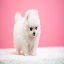

In [ ]:
test_image = tf.keras.utils.load_img('/content/drive/MyDrive/project01/dataset/test_data/pomerian/00000320.jpg', target_size = (64, 64))
test_image

In [ ]:
test_image = tf.keras.utils.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = cnn.predict(test_image/255.0)
training_set.class_indices
if result[0][0] <= 0.5:
  prediction = 'bull'
else:
  prediction = 'pomerian'

1/1 [==============================] - 0s 15ms/step


In [ ]:
print(prediction)

pomerian


In [ ]:
result[0][0]

0.99999475